## K-Means Clustering using Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement k-means clustering for unsupervised learning.

### **K-Means Clustering**
In this task we will predict the number of clusters present in the iris dataset and what are the cluster centres.

### Author: Rishita Goel


### Dataset Extraction

In [25]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [26]:
# Extract the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Calculating optimum number of clusters using Elbow Method

In [27]:
X_train = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

### Plotting within-cluster sum of square(wcss)

Wherever the plot line starts bending and becomes straight eventually, that will be our optimum number of clusters

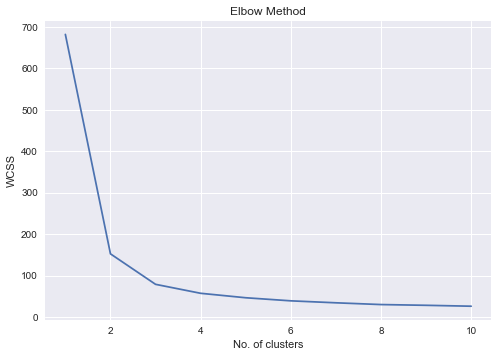

In [28]:
plt.style.use('seaborn')
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

#### We can infer from above graph plot that the line becomes smooth after 3rd or 4th cluster so here I am taking it as 3.

### Data prediction

In [29]:
#making kmeans object using 3 clusters
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_preds = kmeans.fit_predict(X_train)

In [30]:
print(y_preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [31]:
#Cluster Centres
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


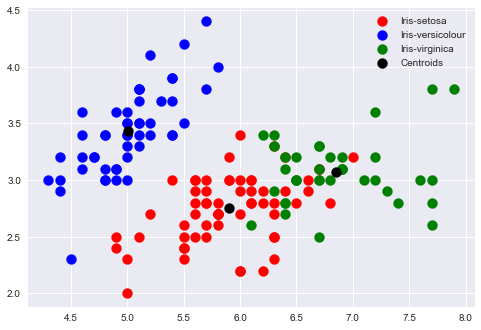

In [32]:
# Visualising the clusters - On the first two columns
plt.scatter(X_train[y_preds == 0, 0], X_train[y_preds == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_train[y_preds == 1, 0], X_train[y_preds == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_train[y_preds == 2, 0], X_train[y_preds == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

#### Our algorithm is successfully predicted our 3 clusters and also the cluster centroids.